 # 1. Import and Install Dependencies

In [17]:
# !pip install tensorflow==2.16.1 opencv-python mediapipe scikit-learn matplotlib keras==3.0qqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqq

In [18]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [19]:
actions = np.array(['hallo', 'du','idle','a'])

# Change the action name for each new action

# 2. Keypoints using MP Holistic

In [20]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                              )
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                              )
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                              )
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                              )
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Mirror the frame
        frame = cv2.flip(frame, 1)

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        cap.release()
        cv2.destroyAllWindows()
cap.release()
cv2.destroyAllWindows()

I0000 00:00:1716362264.259815    5624 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1716362264.263166    6179 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.0.3-1pop1~1711635559~22.04~7a9f319), renderer: AMD Radeon Graphics (radeonsi, renoir, LLVM 15.0.7, DRM 3.57, 6.8.0-76060800daily20240311-generic)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>


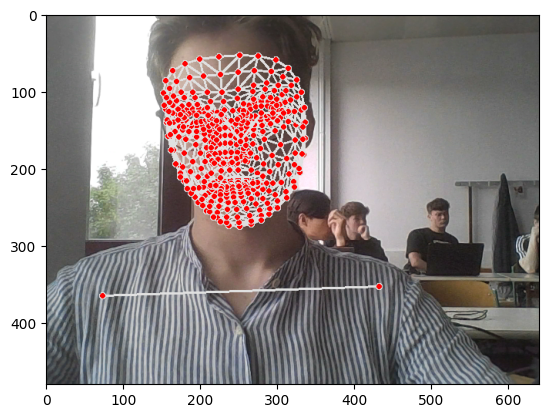

In [21]:
draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [22]:
if results.left_hand_landmarks is not None:
    len(results.left_hand_landmarks.landmark)
else:
    print("No left hand detected.")
    
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

if results.face_landmarks:
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
else:
    np.zeros(1404)

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

No left hand detected.


In [23]:
result_test = extract_keypoints(results)
result_test
np.save('0', result_test)
np.load('SavedModels/0.npy')

array([ 0.34197718,  0.5891912 , -0.61386597, ...,  0.        ,
        0.        ,  0.        ])

In [24]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('CollectionBase/MP_Data')

# 30 sequences worth of data
no_sequences = 30

# Each sequence 30 frames in length
sequence_length = 30
# Folder start
start_folder = 0

# 6. Preprocess Data and Create Labels and Features

In [25]:
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical


In [26]:
label_map = {label:num for num, label in enumerate(actions)}

In [27]:
label_map

{'hallo': 0, 'du': 1, 'idle': 2, 'a': 3}

In [28]:
sequences, labels = [], []
print(os.getcwd())
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        #print(len(sequences[0]))
        labels.append(label_map[action])
#print(len(sequences))

/home/eelam/Desktop/AI/attempt2/AiSignLanguage


In [29]:
np.array(sequences).shape

(120, 30, 1662)

In [30]:
np.array(labels).shape

(120,)

In [31]:
X = np.array(sequences)

In [32]:
X.shape

(120, 30, 1662)

In [33]:
y = to_categorical(labels).astype(int)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [35]:
X_train.shape

(114, 30, 1662)

In [36]:
X_test.shape

(6, 30, 1662)

In [37]:
y_test.shape

(6, 4)

In [38]:
y_train.shape

(114, 4)

# 7. Build and Train LSTM Neural Network

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import TensorBoard


In [40]:
log_dir = os.path.join('CollectionBase/Logs')
tb_callback = TensorBoard(log_dir=log_dir)

# 8. Make Predictions

In [41]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


In [42]:
actions[np.argmax(res[3])]

'a'

In [43]:
actions[np.argmax(y_test[3])]

'a'

# 9. Save Weights

In [44]:
import uuid

# Generate a random UUID
model_uuid = uuid.uuid4()

# Convert the UUID to a string and use it as the model name
model.save(f'{model_uuid}.h5')

/home/eelam/Downloads/.venv/lib/python3.10/site-packages/keras/src/models/model.py:342: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  warnings.warn(


In [45]:
del model

In [46]:
model = Sequential()
model.add(Input(shape=(30,1662)))
model.add(LSTM(64, return_sequences=True, activation='relu', name='lstm1'))
model.add(Dense(64, activation='relu', name='dense1'))
model.add(LSTM(128, return_sequences=True, activation='relu', name='lstm2'))
model.add(Dense(64, activation='relu', name='dense2'))
model.add(LSTM(64, return_sequences=False, activation='relu', name='lstm3'))
model.add(Dense(32, activation='relu', name='dense3'))
model.add(Dense(actions.shape[0], activation='softmax', name='output'))
model.load_weights(f'myai.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [47]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [48]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


In [49]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [50]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 3]],

       [[3, 0],
        [0, 3]]])

In [51]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [52]:
from scipy import stats

In [53]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    # Ensure that the size of 'res' and 'colors' is the same
    if len(res) != len(colors):
        print("Size of 'res' and 'colors' does not match. Please check your inputs.")
        return output_frame
    for num, prob in enumerate(res):
        max_prob = np.max(prob)  # get the maximum probability
        cv2.rectangle(output_frame, (0,60+num*40), (int(max_prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    return output_frame

Size of 'res' and 'colors' does not match. Please check your inputs.


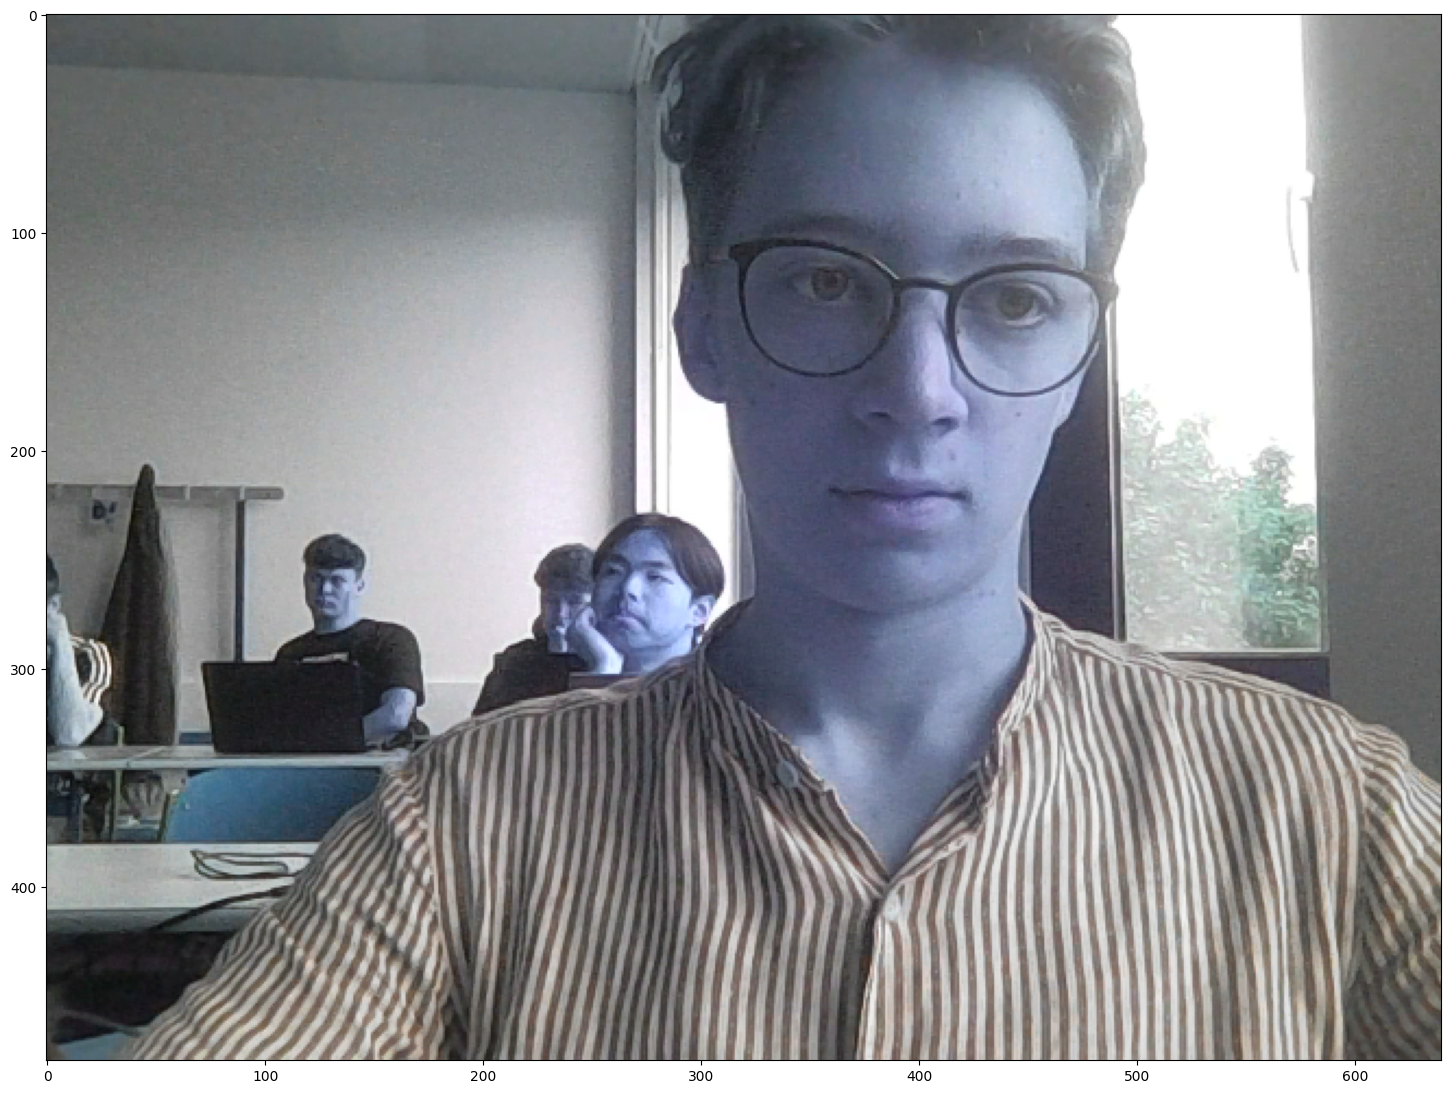

In [54]:
colors = [(245,117,16), (117,245,16), (80,22,10), (121,22,76)]
cap = cv2.VideoCapture(0)  # Start the webcam
ret, image = cap.read()  # Read a frame from the webcam
cap.release()  # Close the webcam

plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [55]:
# 1. New detection variables
'''
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        frame = cv2.flip(frame, 1)
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                if res[np.argmax(res)] > threshold:

                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
'''

"\nsequence = []\nsentence = []\npredictions = []\nthreshold = 0.5\n\ncap = cv2.VideoCapture(0)\n# Set mediapipe model\nwith mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:\n    while cap.isOpened():\n\n        # Read feed\n        ret, frame = cap.read()\n        frame = cv2.flip(frame, 1)\n        # Make detections\n        image, results = mediapipe_detection(frame, holistic)\n        print(results)\n\n        # Draw landmarks\n        draw_styled_landmarks(image, results)\n\n        # 2. Prediction logic\n        keypoints = extract_keypoints(results)\n        sequence.append(keypoints)\n        sequence = sequence[-30:]\n\n        if len(sequence) == 30:\n            res = model.predict(np.expand_dims(sequence, axis=0))[0]\n            print(actions[np.argmax(res)])\n            predictions.append(np.argmax(res))\n\n            #3. Viz logic\n            if np.unique(predictions[-10:])[0]==np.argmax(res):\n                if res[np.argm

In [56]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    collecting = False
    frame_count = 0
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        frame = cv2.flip(frame, 1)
        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Check if 'g' is pressed
        if cv2.waitKey(10) & 0xFF == ord('g'):
            collecting = True
            sequence = []  # Reset the sequence
            frame_count = 0  # Reset the frame count

        # 2. Prediction logic
        if collecting and frame_count < 30:
            keypoints = extract_keypoints(results)
            sequence.append(keypoints)
            sequence = sequence[-30:]
            frame_count += 1

            if frame_count == 30:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]
                print(actions[np.argmax(res)])
                predictions.append(np.argmax(res))
                collecting = False  # Stop collecting after 30 frames

                #3. Viz logic
                if np.unique(predictions[-10:])[0]==np.argmax(res):
                    if res[np.argmax(res)] > threshold:

                        if len(sentence) > 0:
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])

                if len(sentence) > 5:
                    sentence = sentence[-5:]

                # Viz probabilities
                image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1716362268.491123    5624 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1716362268.492299    6251 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.0.3-1pop1~1711635559~22.04~7a9f319), renderer: AMD Radeon Graphics (radeonsi, renoir, LLVM 15.0.7, DRM 3.57, 6.8.0-76060800daily20240311-generic)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
a
